In [9]:
"""
==============================================
Variational training for Mixtures of Gaussians
==============================================

Showcase of different models and algorithms applied to same dataset.

In this example, we show how bnpy makes it easy to apply
different models and algorithms to the same dataset.

"""
import matplotlib
import matplotlib.pyplot as plt
import bnpy
import numpy as np
import os


import seaborn as sns

SMALL_FIG_SIZE = (2.5, 2.5)
FIG_SIZE = (5, 5)
plt.rcParams['figure.figsize'] = FIG_SIZE

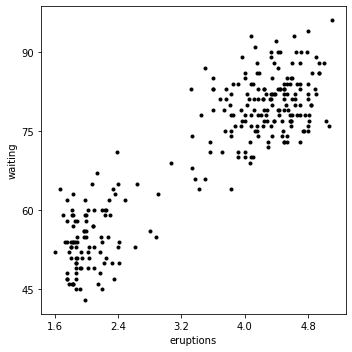

In [10]:
###############################################################################
#
# Load dataset from file

dataset_path = os.path.join(bnpy.DATASET_PATH, 'faithful')
dataset = bnpy.data.XData.read_csv(
    os.path.join(dataset_path, 'faithful.csv'))

###############################################################################
#
# Make a simple plot of the raw data

plt.plot(dataset.X[:, 0], dataset.X[:, 1], 'k.')
plt.xlabel(dataset.column_names[0])
plt.ylabel(dataset.column_names[1])
plt.tight_layout()
data_ax_h = plt.gca()


###############################################################################
#
# Setup: Helper function to display the learned clusters
# ------------------------------------------------------

def show_clusters_over_time(
        task_output_path=None,
        query_laps=[0, 1, 2, 10, 20, None],
        nrows=2):
    ''' Show 2D elliptical contours overlaid on raw data.
    '''
    ncols = int(np.ceil(len(query_laps) // float(nrows)))
    fig_handle, ax_handle_list = plt.subplots(
        figsize=(SMALL_FIG_SIZE[0] * ncols, SMALL_FIG_SIZE[1] * nrows),
        nrows=nrows, ncols=ncols, sharex=True, sharey=True)
    for plot_id, lap_val in enumerate(query_laps):
        cur_model, lap_val = bnpy.load_model_at_lap(task_output_path, lap_val)
        cur_ax_handle = ax_handle_list.flatten()[plot_id]
        bnpy.viz.PlotComps.plotCompsFromHModel(
            cur_model, dataset=dataset, ax_handle=cur_ax_handle)
        cur_ax_handle.set_title("lap: %d" % lap_val)
        cur_ax_handle.set_xlabel(dataset.column_names[0])
        cur_ax_handle.set_ylabel(dataset.column_names[1])
        cur_ax_handle.set_xlim(data_ax_h.get_xlim())
        cur_ax_handle.set_ylim(data_ax_h.get_ylim())
    plt.tight_layout()
    plt.show()

Dataset Summary:
X Data
  total size: 272 units
  batch size: 272 units
  num. batches: 1
Allocation Model:  DP mixture with K=0. Concentration gamma0= 5.00
Obs. Data  Model:  Gaussian with diagonal covariance.
Obs. Data  Prior:  independent Gauss-Wishart prior on each dimension
  Wishart params 
    nu = 4 
  beta = [ 10  10] 
  Expectations
  E[  mean[k]] = 
  [ 0  0]
  E[ covar[k]] = 
  [[5. 0.]
   [0. 5.]]
Initialization:
  initname = randexamples
  K = 20 (number of clusters)
  seed = 1607680
  elapsed_time: 0.0 sec
Learn Alg: memoVB | task  1/1 | alg. seed: 1607680 | data order seed: 8541952
task_output_path: /tmp/faithful/showcase-K=20-lik=DiagGauss-ECovMat=5*eye/1
    1.000/1000 after      0 sec. |    173.1 MiB | K   20 | loss  3.002088161e+00 |  
    2.000/1000 after      0 sec. |    173.1 MiB | K   20 | loss  2.966309748e+00 | Ndiff    4.584 
    3.000/1000 after      0 sec. |    173.1 MiB | K   20 | loss  2.949498401e+00 | Ndiff    4.501 
    4.000/1000 after      0 sec. |  

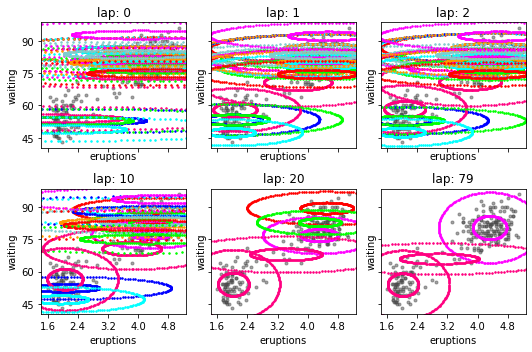

In [11]:
###############################################################################
#
# *DiagGauss* observation model
# -----------------------------
#
# Assume diagonal covariances.
#
# Start with too many clusters (K=20)

gamma = 5.0
sF = 5.0
K = 20

diag_trained_model, diag_info_dict = bnpy.run(
    dataset, 'DPMixtureModel', 'DiagGauss', 'memoVB',
    output_path='/tmp/faithful/showcase-K=20-lik=DiagGauss-ECovMat=5*eye/',
    nLap=1000, nTask=1, nBatch=1, convergeThr=0.0001,
    gamma0=gamma, sF=sF, ECovMat='eye',
    K=K, initname='randexamples',
    )
show_clusters_over_time(diag_info_dict['task_output_path'])

  --nBatch
Dataset Summary:
X Data
  num examples: 272
  num dims: 2
Allocation Model:  DP mixture with K=0. Concentration gamma0= 5.00
Obs. Data  Model:  Gaussian with full covariance.
Obs. Data  Prior:  Gauss-Wishart on mean and covar of each cluster
  E[  mean[k] ] = 
   [0. 0.] 
  E[ covar[k] ] = 
  [[5. 0.]
   [0. 5.]]
Initialization:
  initname = randexamples
  K = 20 (number of clusters)
  seed = 1607680
  elapsed_time: 0.0 sec
Learn Alg: VB | task  1/1 | alg. seed: 1607680 | data order seed: 8541952
task_output_path: /tmp/faithful/showcase-K=20-lik=Gauss-ECovMat=5*eye/1
        1/1000 after      0 sec. |    173.6 MiB | K   20 | loss  2.904406498e+00 |  
        2/1000 after      0 sec. |    173.6 MiB | K   20 | loss  2.876066302e+00 | Ndiff    2.071 
        3/1000 after      0 sec. |    173.6 MiB | K   20 | loss  2.864944306e+00 | Ndiff    2.664 
        4/1000 after      0 sec. |    173.6 MiB | K   20 | loss  2.852026479e+00 | Ndiff    3.160 
        5/1000 after      0 sec. 

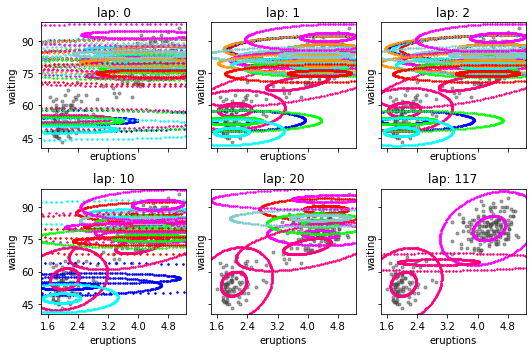

In [12]:
###############################################################################
#
# *Gauss* observations + VB
# -------------------------
#
# Assume full covariances.
#
# Start with too many clusters (K=20)

full_trained_model, full_info_dict = bnpy.run(
    dataset, 'DPMixtureModel', 'Gauss', 'VB',
    output_path='/tmp/faithful/showcase-K=20-lik=Gauss-ECovMat=5*eye/',
    nLap=1000, nTask=1, nBatch=1, convergeThr=0.0001,
    gamma0=gamma, sF=sF, ECovMat='eye',
    K=K, initname='randexamples',
    )
show_clusters_over_time(full_info_dict['task_output_path'])

  --nBatch
Dataset Summary:
X Data
  num examples: 272
  num dims: 2
Allocation Model:  DP mixture with K=0. Concentration gamma0= 5.00
Obs. Data  Model:  Gaussian with fixed zero means, full covariance.
Obs. Data  Prior:  Wishart on prec matrix Lam
  E[ CovMat[k] ] = 
  [[5. 0.]
   [0. 5.]]
Initialization:
  initname = randexamples
  K = 20 (number of clusters)
  seed = 1607680
  elapsed_time: 0.0 sec
Learn Alg: VB | task  1/1 | alg. seed: 1607680 | data order seed: 8541952
task_output_path: /tmp/faithful/showcase-K=20-lik=ZeroMeanGauss-ECovMat=5*eye/1
        1/1000 after      0 sec. |    174.0 MiB | K   20 | loss  4.019419551e+00 |  
        2/1000 after      0 sec. |    174.0 MiB | K   20 | loss  3.989063967e+00 | Ndiff    3.437 
        3/1000 after      0 sec. |    174.0 MiB | K   20 | loss  3.941416771e+00 | Ndiff    3.621 
        4/1000 after      0 sec. |    174.0 MiB | K   20 | loss  3.899222162e+00 | Ndiff    3.882 
        5/1000 after      0 sec. |    174.0 MiB | K   20 |

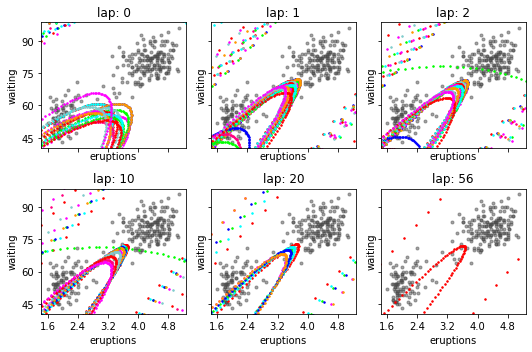

In [13]:
###############################################################################
#
# *ZeroMeanGauss* observations + VB
# ---------------------------------
#
# Assume full covariances and fix all means to zero.
#
# Start with too many clusters (K=20)

zm_trained_model, zm_info_dict = bnpy.run(
    dataset, 'DPMixtureModel', 'ZeroMeanGauss', 'VB',
    output_path='/tmp/faithful/showcase-K=20-lik=ZeroMeanGauss-ECovMat=5*eye/',
    nLap=1000, nTask=1, nBatch=1, convergeThr=0.0001,
    gamma0=gamma, sF=sF, ECovMat='eye',
    K=K, initname='randexamples',
    )
show_clusters_over_time(zm_info_dict['task_output_path'])

Dataset Summary:
X Data
  total size: 272 units
  batch size: 6 units
  num. batches: 50
Allocation Model:  DP mixture with K=0. Concentration gamma0= 5.00
Obs. Data  Model:  Gaussian with full covariance.
Obs. Data  Prior:  Gauss-Wishart on mean and covar of each cluster
  E[  mean[k] ] = 
   [0. 0.] 
  E[ covar[k] ] = 
  [[5. 0.]
   [0. 5.]]
Initialization:
  initname = randexamples
  K = 20 (number of clusters)
  seed = 1607680
  elapsed_time: 0.0 sec
Learn Alg: soVB | task  1/1 | alg. seed: 1607680 | data order seed: 8541952
task_output_path: /tmp/faithful/showcase-K=20-lik=Gauss-ECovMat=5*eye-alg=soVB/1
    0.020/50 after      0 sec. |    174.4 MiB | K   20 | loss  3.175641896e+01 |  lrate 0.7022
    0.040/50 after      0 sec. |    174.4 MiB | K   20 | loss  1.623797998e+01 |  lrate 0.5710
    0.060/50 after      0 sec. |    174.4 MiB | K   20 | loss  1.111422252e+01 |  lrate 0.4931
    1.000/50 after      0 sec. |    174.4 MiB | K   20 | loss  1.174085005e+01 |  lrate 0.1346
    

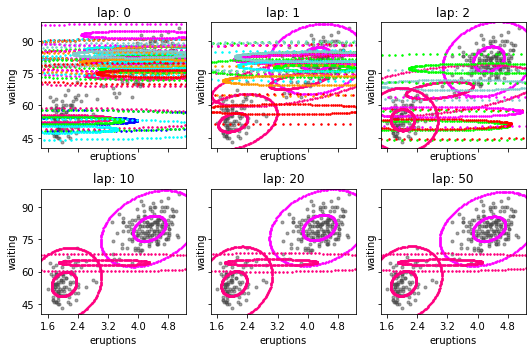

In [14]:
###############################################################################
#
# *Gauss* observations + stochastic VB
# ------------------------------------
#
# Assume full covariances and fix all means to zero.
#
# Start with too many clusters (K=20)

stoch_trained_model, stoch_info_dict = bnpy.run(
    dataset, 'DPMixtureModel', 'Gauss', 'soVB',
    output_path=\
        '/tmp/faithful/showcase-K=20-lik=Gauss-ECovMat=5*eye-alg=soVB/',
    nLap=50, nTask=1, nBatch=50,
    rhoexp=0.51, rhodelay=1.0,
    gamma0=gamma, sF=sF, ECovMat='eye',
    K=K, initname='randexamples',
    )
show_clusters_over_time(stoch_info_dict['task_output_path'])

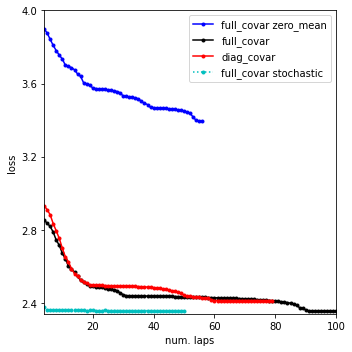

In [15]:
###############################################################################
# 
# Compare loss function traces for all methods
# --------------------------------------------
#
plt.figure()

plt.plot(
    zm_info_dict['lap_history'],
    zm_info_dict['loss_history'], 'b.-',
    label='full_covar zero_mean')
plt.plot(
    full_info_dict['lap_history'],
    full_info_dict['loss_history'], 'k.-',
    label='full_covar')
plt.plot(
    diag_info_dict['lap_history'],
    diag_info_dict['loss_history'], 'r.-',
    label='diag_covar')
plt.plot(
    stoch_info_dict['lap_history'],
    stoch_info_dict['loss_history'], 'c.:',
    label='full_covar stochastic')
plt.legend(loc='upper right')
plt.xlabel('num. laps')
plt.ylabel('loss')
plt.xlim([4, 100]) # avoid early iterations
plt.ylim([2.34, 4.0]) # handpicked
plt.tight_layout()
plt.show()